# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-33, 34, 35 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Spezifische Wärmekapazität

Tin Vrkic E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Nock E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Asya Can

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 17.06.24

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/README.md).**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kafe2
from uncertainties import ufloat, unumpy as unp
import pathlib

In [40]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

def weighted_mean_gauss(arr):
    res = np.sum( unp.nominal_values(arr) / unp.std_devs(arr) ) / np.sum( 1 / unp.std_devs(arr) )
    return res

def std_weighted_mean_gauss(arr):
    N = unp.nominal_values(arr).size
    arr_bar = weighted_mean_gauss(arr)
    return np.sqrt( (N/(N-1)) * np.sum( (unp.nominal_values(arr)-arr_bar)**2 / unp.std_devs(arr) ) / np.sum( 1/unp.std_devs(arr) ) )

# specific heat capacity of water at room temperature
c_H2O = 4184 # J/kg K

## Aufgabe 1: Spezifische Wärmekapazität aus Mischtemperatur

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie so genau wie mit den verfügbaren Mitteln möglich, die spezifische Wärmekapazität $c_{X}$ von Aluminium und noch eines weiteren Metalls, durch das Herstellen von Mischtemperaturen in einem Glas-Kalorimeter. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Planung des Messvorhabens

 * Beschreiben Sie das von Ihnen geplante Messvorhaben und den dazu verwendeten Aufgbau in eigenen Worten.
 * Führen Sie ggf. geeignete Vergleichs- und Kalibrationsmessreihen durch, um sich von der Eignung der Methode zu überzeugen oder Korrekturen oder Unsicherheiten abzuschätzen. 

---

In this experiment we want to measure the specific heat capacity (SHC) of aluminium and another metal of our choice by "mixing" the metal with water inside a calorimeter. For this, we measure the masses of both the water and the metal, their starting temperatures and finally their equilibrium temperatures. There are ceratin starting paramters that are to be fixed prior to the experiment, which will be discussed in the following.  

- We used a granulate of the metal instead of a solid body so that the heat exchange can happen more efficently due to higher surface area  
- For the starting temperatures we chose hot metal and water at room temperature for a few reasons: first, we need to minimize the error of heat exchange of the water with the environment, so if both have around the same temperature, heat exchange will barely happen and we keep that error low. Second, the SHC of water at room temperature is well known and stays very constant around room temperature (which is also one reason to use water and not another liquid). Due to its much higher SHC than metal, the equilibrium temperature is not much higher than its starting temperature and we can use the known, constant value. Also water is the most abundant resource on our planet and thus readily available, though we needed pure, distilled water, which is not as abundant as, say, sea water, but it's still water (that's the second reason to use water over another liquid).  
- The water to metal weight ratio should definitely be in favor of the water so that, again, its temperature doesn't change too much and we can use the known, constant value for its SHC  
- Since the calorimeter also has its own SHC, we will first mix room temperature water with warm water to estimate its effect on the subsequent measurements  
-   

The formula to calculate a material M's SHC is given in the preparation as the following:
$$c_{M}=c_{H_2O}\frac{m_{H_2O}(T_{Mix}-T_{H_2O})}{m_M(T_M-T_{Mix})}$$




In dieser Aufgabe soll ein Aufbau bestimmt werden, mit dem die spezifische Wärmekapazität $c_M$ von verschiedenen Metallen gemessen werden kann. Hierbei sollen verschiedene Messfehler verringert werden. 

Beim vermessenen Stoff sollte es sich um eine Form handeln, die möglichst gut Wärme mit ihrer Umgebung, also dem Wasser im Kalorimeter, austauschen kann. Das führt dazu, das sich möglichst schnell ein Gleichgewicht einstellt und wenig Wärme an die Umgebung verloren geht. Es wird also ein Granulat einem festen Körper vorgezogen, obwohl sich hier mögliche Probleme beim Erhitzen und bei der genauen Bestimmung der Masse ergeben. 

Die Flüssigkeit im Kalorimeter hätte an der Öffnung einer Vergleichsweise große, unisolierte Kontaktoberfläche. Um die Verluste der Wärme möglichst gering zu halten sollte sich die Flüssigkeit bei Raumtemperatur und das Metall bei höheren Temperaturen befinden. 

Bei der Flüssigkeit sollte es sich um Wasser handeln, da es aufgrund seiner hohen Wärmekapazität temperaturstabilder gegenüber der Umgebung ist als andere Stoffe. 

### hier fehlen noch Ausarbeitungen

---

### Aufgabe 1.2: Durchführung des Messprogramms und Auswertung

 * Führen Sie eine Messreihe geeigneter Länge für Aluminium und ein weiteres Metall Ihrer Wahl durch.  

 * Bestimmen Sie für Ihre Auswertung Unsicherheiten auf alle Parameter, die die Messung Ihrer Meinung nach beeinflussen können, pflanzen Sie diese auf das Ergebnis fort und vergleichen Sie mit der Erwartung.

---

First, we measured the equilibrium temperature of a mix of cold and warm water, while measuring the weight and temperature of both at appropriate times to get an estimate of how the SHC of the calorimeter affects all our measurements. For that we compare the equilibrium temperatures we measured with what we would theoretically expect given the masses and starting temperatures we used. The formula can be derived from the one above for water and another, unspecified material:
$$T_{Mix}=\frac{m_{warm}T_{warm}+m_{cold}T_{cold}}{m_{warm}+m_{cold}}$$ 

In [39]:
# Measurement with only water
# masses of the cold and warm water in kg
m_water_cold = unp.uarray([142.93, 130.22, 126.89, 114.38, 110.01],[.01]) * 10**(-3)
m_water_warm = unp.uarray([56.90, 83.13, 85.16, 76.42, 115.59],[.01]) * 10**(-3)
# temperatures of the cold and warm water and equilibrium temperatures in K
T_water_cold = unp.uarray([22.9, 23.8, 26.6, 31.2, 24.2],[.1]) + 273.15
T_water_warm = unp.uarray([59.8, 58.6, 53.5, 81.0, 63.2],[.1]) + 273.15
T_water_mix = unp.uarray([33.2, 37.1, 36.9, 49.3, 44],[.1]) + 273.15

# Expected equilibrium temperatures
def equil_temp_water(m_w, m_c, T_w, T_c):
    return ( m_w * T_w + m_c * T_c ) / ( m_w + m_c )

T_water_mix_exp = equil_temp_water(m_water_warm, m_water_cold, T_water_warm, T_water_cold)
print(f"Measured equilibrium temperatures: {unp.nominal_values(T_water_mix)}")
print(f"Expected equilibrium temperatuers: {unp.nominal_values(T_water_mix_exp)}")

# Calculate by how much every measurement deviates from the expectation
ratio_exp_to_measure = np.absolute( T_water_mix / T_water_mix_exp - 1 ) 
mean_ratio = weighted_mean_gauss(ratio_exp_to_measure)
print(f"Weighted average of the ratios of measured to expected equilibrium temperatures: {mean_ratio} = {mean_ratio*100:.1f}%")

Measured equilibrium temperatures: [306.35 310.25 310.05 322.45 317.15]
Expected equilibrium temperatuers: [306.55698093 310.50952191 310.55313134 324.29610063 317.33231383]
Weighted average of the ratios of measured to expected equilibrium temperatures: 0.0019159309428620388 = 0.2%


By taking the ratio of the measured and the expected equilibrium temperatures and subtracting one, because we only want to know by how much it deviates, and taking the weighted average, we get a value of $\approx 0.002=0.2\%$. The measured temperature is lower than what it should be by $0.2\%$ due to the SHC of the calorimeter and maybe other factors as well, such as minimal heat exchange with the environment.

Now, we first measured the SHC of aluminium. Unfortunately, since we didn't know we had to heat the aluminium (and later the tin) up to about $100^\circ C$, we only heated it to about $60^\circ C-90^\circ C$ (the tin to about $70^\circ C-90^\circ C$). Because of that, we did one additional measurement with $100^\circ C$ hot aluminium and tin respectively to check if our results are acceptable despite that error or by how much they might be off. 

In [42]:
# values need to be in K (Temp), kg (mass) and J/kg*K (spec. heat cap.)
def get_cM(m_H2O, mM, T_H2O, TM, T_mix):
    return c_H2O * ( m_H2O / mM ) * ( T_mix - T_H2O ) / ( TM - T_mix )

In [64]:
# Measurements with aluminium (too cold)
# masses of the water and aluminium in kg
m_water_al = unp.uarray([182.53, 182.45, 201.10, 203.22, 204.62],[.01]) * 10**(-3)
m_al = ufloat(22.62,.01) * 10**(-3)
# Temperatures of the water, aluminium and equilibrium in K
T_water_al = unp.uarray([23.3, 24.1, 25.2, 25.6, 26.1],[.1]) + 273.15
T_al = unp.uarray([94.9, 86.5, 71.7, 69.2, 66.7],[.1]) + 273.15
T_mix_al = unp.uarray([25.9, 26.3, 26.6, 27.3, 27.5],[.1]) + 273.15

c_al_cold = ufloat( weighted_mean_gauss( get_cM( m_water_al , m_al , T_water_al , T_al , T_mix_al ) ) , std_weighted_mean_gauss( get_cM( m_water_al , m_al , T_water_al , T_al , T_mix_al ) ) )


# Measurement with aluminium (100°C)
m_water_al_hot = ufloat(147.56, .01) * 10**(-3)
m_al_hot = ufloat(18.93, .01) * 10**(-3)
T_water_al_hot = ufloat(23.8, .1) + 273.15
T_al_hot = ufloat(105.9, .1) + 273.15
T_mix_al_hot = ufloat(27.7, .1) + 273.15

c_al_hot = get_cM( m_water_al_hot , m_al_hot , T_water_al_hot , T_al_hot , T_mix_al_hot )

print(f"Literature value of SHC of aluminium: 896 J/kg*K")
print(f"SHC of aluminium (60-90°C): c_Al = {c_al_cold} J/kg*K")
print(f"SHC of aluminium (100°C): c_Al = {c_al_hot} J/kg*K")
print(f"Ratio of aluminium (cold) to literature: {c_al_cold/896:.3f}")
print(f"Ratio of aluminium (hot) to literature: {c_al_hot/896:.3f}")

Literature value of SHC of aluminium: 896 J/kg*K
SHC of aluminium (60-90°C): c_Al = (1.29+/-0.13)e+03 J/kg*K
SHC of aluminium (100°C): c_Al = (1.63+/-0.06)e+03 J/kg*K
Ratio of aluminium (cold) to literature: 1.443+/-0.143
Ratio of aluminium (hot) to literature: 1.815+/-0.068


The values we get are:  
- SHC of aluminium (aluminium only heated to about $60^\circ C-90^\circ C$): $c_{Al}=(1.29\pm0.13)\,\frac{J}{kgK}$  
- SHC of aluminium (aluminium heated to about $100^\circ$): $c_{Al}=(1.63\pm0.06)\,\frac{J}{kgK}$  

Somehow, the measurement at $100^\circ C$, that should have corrected our previous measurements a little, turns out worse than the latter. 

In [65]:
# Measurements with tin
# masses of the water and tin in kg
m_water_tin = unp.uarray([186.53, 206.76, 202.88, 215.14, 173.75],[.01]) * 10**(-3)
m_tin = ufloat(24.86,.01) * 10**(-3)
# Temperatures of the water, tin and equilibrium in K
T_water_tin = unp.uarray([23.7, 24.2, 24.5, 24.9, 25.2],[.1]) + 273.15
T_tin = unp.uarray([87.7, 83.6, 79.4, 77.6, 71.8],[.1]) + 273.15
T_mix_tin = unp.uarray([24.9, 24.9, 25.4, 25.7, 26.0],[.1]) + 273.15

c_tin_cold = ufloat( weighted_mean_gauss( get_cM( m_water_tin , m_tin , T_water_tin , T_tin , T_mix_tin ) ) , std_weighted_mean_gauss( get_cM ( m_water_tin , m_tin , T_water_tin , T_tin , T_mix_tin ) ) )

# Measurement with aluminium (100°C)
m_water_tin_hot = ufloat(194.12, .01) * 10**(-3)
m_tin_hot = m_tin
T_water_tin_hot = ufloat(24.2, .1) + 273.15
T_tin_hot = ufloat(99.4, .1) + 273.15
T_mix_tin_hot = ufloat(25.5, .01) + 273.15

c_tin_hot = get_cM( m_water_tin_hot , m_tin_hot , T_water_tin_hot , T_tin_hot , T_mix_tin_hot )

print(f"Literature value of SHC of tin: 221 J/kg*K")
print(f"SHC of tin (70-90°C): c_Tin = {c_tin_cold} J/kg*K")
print(f"SHC of tin (100°C): c_Tin = {c_tin_hot} J/kg*K")
print(f"Ratio of tin (cold) to literature: {c_tin_cold/221:.3f}")
print(f"Ratio of tin (hot) to literature: {c_tin_hot/221:.3f}")

Literature value of SHC of tin: 221 J/kg*K
SHC of tin (70-90°C): c_Tin = (5.3+/-0.7)e+02 J/kg*K
SHC of tin (100°C): c_Tin = (5.7+/-0.4)e+02 J/kg*K
Ratio of tin (cold) to literature: 2.408+/-0.335
Ratio of tin (hot) to literature: 2.601+/-0.201


In diesem Versuch wird die Messung nach den Methoden, die in 1.1 erläutert wurden, durchgeführt. 

Die aufgenommen Daten werden mithilfe der Formel $c_M = c_{H_2O} \frac{m_{H_2O} (T_{H_2O}-T_{mix})}{m_M(T_{H_2O}-T_{mix})}$ dann zur spezifischen Wärmekapazität umgerechnet und der gewichtete Mittelwert aus den Einzelmessungen gebildet. Hierbei werden die Fehler, die auf jedem einzelnen Wert liegen mit Hilfe des uncertainties-Paketes verarbeitet und in die Berechnung mit eingebracht. 

Es ergeben sich somit Werte von:
$$c_M(Aluminium) = \pm  \frac{kJ}{kgK}, c_M() = \pm  \frac{kJ}{kgK}$$

im Vergleich mit den Literaturwerten:
$$c_M(Aluminium) = \pm  \frac{kJ}{kgK}, c_M() = \pm  \frac{kJ}{kgK}$$


---

## Aufgabe 2: Spezifische Wärmekapazität von Aluminium als Funktion der Temperatur

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Messen Sie $c_{\mathrm{Al}}(T)$ in Abhängigkeit von der Temperatur in einem Bereich zwischen $T=100-300\,\mathrm{K}$. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Datennahme

 * Beschreiben Sie das VOrgehen in eigenen Worten. 
 * Bereiten Sie die Datennahme vor, nehmen Sie die Messpunkte auf.

---

Kanal 5: Referenztemperatur
Kanal 1: Spannung in mV

### Aufgabe 2.2: Kalibration des Thermoelements

 * Kalibrieren Sie das $\mathrm{NiCr}$-$\mathrm{Ni}$-Thermoelement von ursprünglichen Angabe von Volt auf eine Temperaturmessung in Kelvin. 
 * Sie können diese Kalibration mit Hilfe der Datei [calibration.csv](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/params/calibration.csv) vornehmen. 

---

[{'main': {'plots': [{'type': 'data',
     'fit_index': 0,
     'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x218f19013a0>,
     'artist': <ErrorbarContainer object of 3 artists>},
    {'type': 'model',
     'fit_index': 0,
     'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x218f19013a0>,
     'artist': None},
    {'type': 'model_line',
     'fit_index': 0,
     'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x218f19013a0>,
     'artist': [<matplotlib.lines.Line2D at 0x218f210d4f0>]},
    {'type': 'model_error_band',
     'fit_index': 0,
     'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x218f19013a0>,
     'artist': <matplotlib.collections.PolyCollection at 0x218f210d700>}],
   'x_range': (-0.0063052999204956, 0.0028093000757507987)}}]

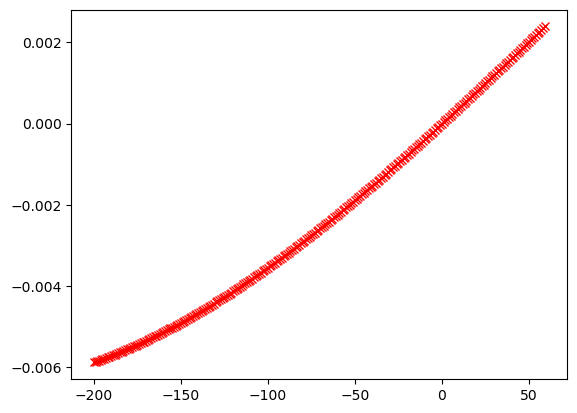

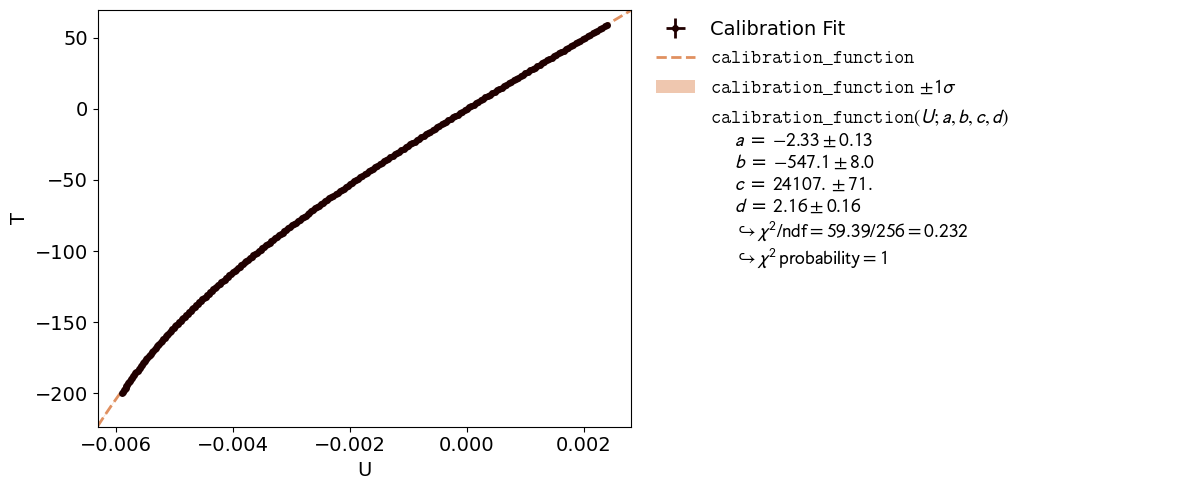

In [6]:
calibration = pd.read_csv(f"{str(pathlib.Path().resolve())}/params/calibration.csv", delimiter=",", decimal=".")
calib_T, calib_U = np.array(calibration["T"], dtype=np.float32), np.array(calibration["U"], dtype=np.float32) * 10**(-3)
plt.plot(calib_T, calib_U, "rx")
def calibration_function(U, a=-1, b=1, c=1, d=1):
    return a * np.exp(b*U) + c * U + d
calib_data = np.array([calib_U, calib_T])
calib_error = np.array([.016*10**(-3), .05])
calib_label = ["U" , "T"]
calib_title = "Calibration Fit"
calib_fit = fit_funktion(calib_data, calibration_function, calib_error, calib_label, calib_title)
calib_fit[2].plot()

### Aufgabe 2.3: Korrektur des Wärmegangs

Trotz Wärmeisolation nimmt der für die Messung verwendete Aluminium-Hohlzylinder im Verlauf der Messung zusätzlich zur elektrischen Heizleistung Wärme aus der Umgebung auf (**Wärmegang**). 

 * Sie könnten den Wärmegang durch eine zweite, gleichartige Messung, ohne elektrische Heizung abschätzen (**Nullmessung**) und korrigieren. Eine solche Messung dauert allerdings $24$ Stunden, sie lässt sich also nicht an einem Versuchstag durchführen. 
 * Sie können stattdessen die Daten aus der Datei [waermegang.csv](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/params/waermegang.csv) für diese Korrektur verwenden. 

---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

### Aufgabe 2.4: Bestimmung von $c_{\mathrm{Al}}(T)$

 * Bestimmen Sie den Verlauf der spezifischen Wärmekapazität von Aluminium als Funktion von $T$. 
 * Bestimmen Sie aus diesem Verlauf den Wert für $T=20^{\circ}\mathrm{C}$ und vergleichen Sie mit Ihrer Erwartung.
 * Bestimmen Sie aus diesem Verlauf den Wert für $T_{\mathrm{Mix}}$ und vergleichen Sie mit dem Ergebnis aus **Aufgabe 1.2**.
 
---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---